
## <font color="blue">Disciplina: Inteligência Artificial</font>

### <font color="red"><i>Previsão do Clima</i></font>
##### <font color="black">Neste Notebook será realizado o processo de análise e preparação dos dados do clima de Seattle, além da aplicação de um modelo de regressão para prever a temperatura máxima.</font>


In [43]:
# Identificação do grupo:
# - Leonardo Henrique de Oliveira Matos, 10389516
# - Victor Junqueira Colombaro, 10395711


# Explicação dos Dados
O dataset utilizado contém as seguintes colunas:
- **date**: Data de registro das observações.
- **precipitation**: Precipitação em milímetros.
- **temp_max**: Temperatura máxima do dia (em °C),
- **temp_min**: Temperatura mínima do dia (em °C).
- **wind**: Velocidade do vento (em m/s).
- **weather**: Tipo de clima, que será convertido em variáveis binário (DUMMY).


In [44]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# Carregar o dataset original
dataset_original = pd.read_csv('Weather_Dataset.csv')

# Visualizar as primeiras linhas do dataset original
print("Primeiras linhas do dataset original:")
print(dataset_original.head())


Primeiras linhas do dataset original:
         date  precipitation  temp_max  temp_min  wind  weather
0  2012-01-01            0.0      12.8       5.0   4.7  drizzle
1  2012-01-02           10.9      10.6       2.8   4.5     rain
2  2012-01-03            0.8      11.7       7.2   2.3     rain
3  2012-01-04           20.3      12.2       5.6   4.7     rain
4  2012-01-05            1.3       8.9       2.8   6.1     rain


In [45]:
# Carregar o dataset já preparado
file_path = 'Updated_Weather_Dataset.csv'  # Ajuste para o caminho correto ao executar
dataset = pd.read_csv(file_path)

# Visualizar as primeiras linhas do dataset
dataset.head()

,date,precipitation,temp_max,temp_min,wind,weather_fog,weather_rain,weather_snow,weather_sun
0,2012-01-01,-0.453650,12.8,5.0,1.014980,0,0,0,0
1,2012-01-02,1.178598,10.6,2.8,0.875833,0,1,0,0
2,2012-01-03,-0.333852,11.7,7.2,-0.654780,0,1,0,0
3,2012-01-04,2.586224,12.2,5.6,1.014980,0,1,0,0
4,2012-01-05,-0.258978,8.9,2.8,1.989006,0,1,0,0



# Preparação dos Dados
Será realizada a normalização das variáveis contínuas (precipitação e vento) e a transformação da variável categórica **weather** em variáveis dummies.


In [46]:
# Conversão da coluna 'date' para formato datetime
dataset['date'] = pd.to_datetime(dataset['date'])

# Normalizar 'precipitation' e 'wind'
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dataset[['precipitation', 'wind']] = scaler.fit_transform(dataset[['precipitation', 'wind']])

# Visualizar os dados processados
dataset.head()

,date,precipitation,temp_max,temp_min,wind,weather_fog,weather_rain,weather_snow,weather_sun
0,2012-01-01,-0.453650,12.8,5.0,1.014980,0,0,0,0
1,2012-01-02,1.178598,10.6,2.8,0.875833,0,1,0,0
2,2012-01-03,-0.333852,11.7,7.2,-0.654780,0,1,0,0
3,2012-01-04,2.586224,12.2,5.6,1.014980,0,1,0,0
4,2012-01-05,-0.258978,8.9,2.8,1.989006,0,1,0,0



# Aplicação do Modelo de Regressão
Será aplicado o modelo de regressão linear para prever a temperatura máxima (**temp_max**) com base nas outras variáveis.


In [47]:
# Definir variáveis independentes (X) e dependentes (y)
X = dataset.drop(columns=['date', 'temp_max', 'temp_min']) # Changed updated_dataset to dataset
y = dataset['temp_max'] # Changed updated_dataset to dataset

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Aplicar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
r2 = r2_score(y_test, y_pred)

print(f'R-squared: {r2}')

R-squared: 0.2109572472470077


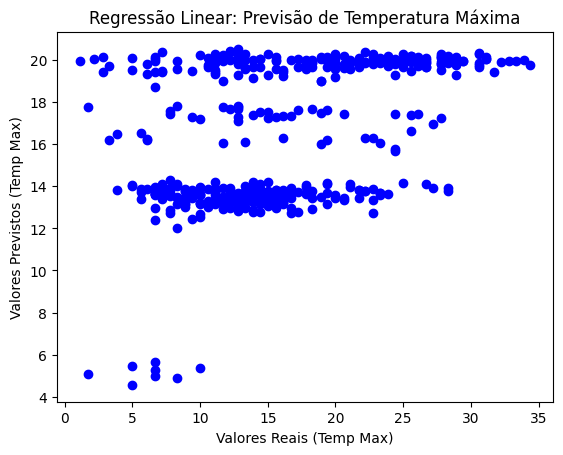

In [48]:

# Visualização dos Resultados
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Valores Reais (Temp Max)')
plt.ylabel('Valores Previstos (Temp Max)')
plt.title('Regressão Linear: Previsão de Temperatura Máxima')
plt.show()


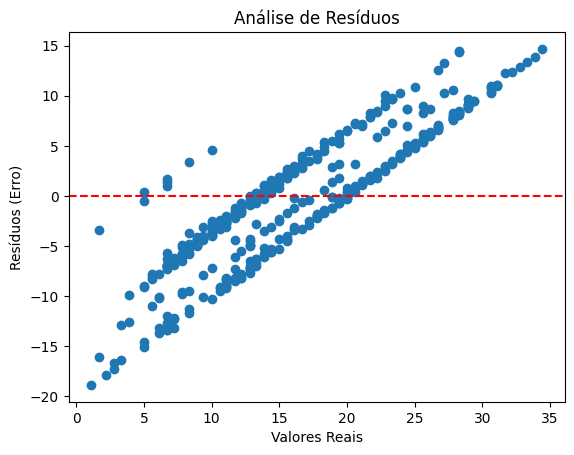

In [49]:

# Análise de resíduos
residuos = y_test - y_pred

# Plotar resíduos
plt.scatter(y_test, residuos)
plt.xlabel('Valores Reais')
plt.ylabel('Resíduos (Erro)')
plt.title('Análise de Resíduos')
plt.axhline(0, color='red', linestyle='--')
plt.show()


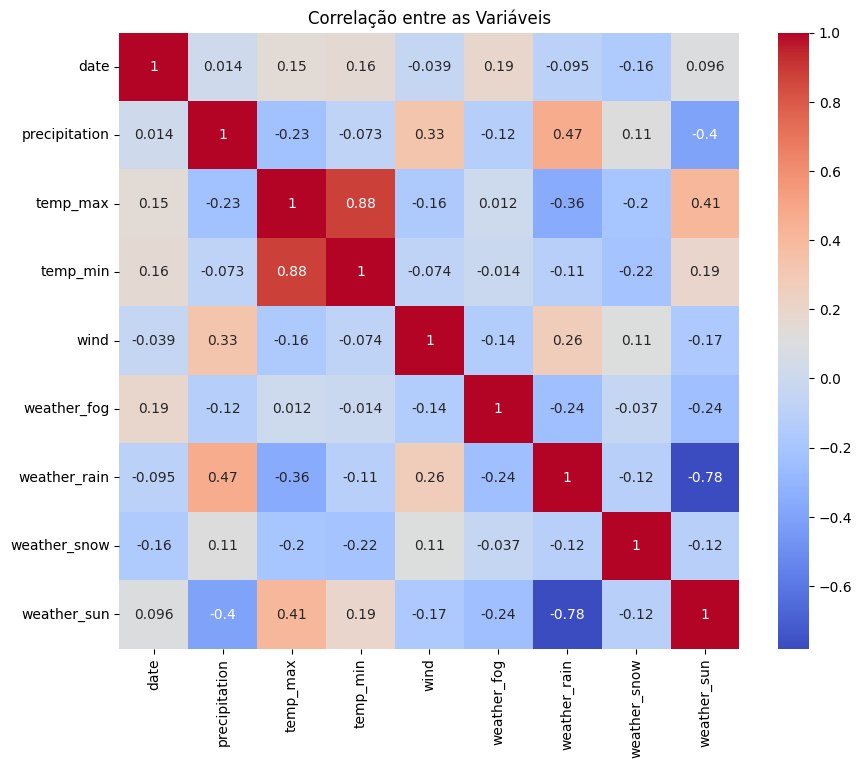

In [50]:
# Gráfico de correlação entre as variáveis
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm') # Changed updated_dataset to dataset
plt.title("Correlação entre as Variáveis")
plt.show()